In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Read the Dataset
data=pd.read_csv('insurance.csv')
print(data)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
#Display the first five dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Shape of the data 

In [4]:
#Returns the dimensions of the data(rows,columns).
data.shape

(1338, 7)

# Data type of each attribute

In [5]:
#Info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data has 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type(Strings in the column)

# Checking the presence of missing values 

In [6]:
data.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
#Calculating the sum of missing values using apply funvtion
data.isna().apply(pd.value_counts) 

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


No null values in the dataset

# 5 point summary of numerical attributes 

In [8]:
#Five point summary for the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data looks good as all the statistics are reasonable.
Looking at the age column, data looks representative of the true age distribution of the adult population,being mean age around 39 yrs old.
Very few people have more than 2 children.
The charges amount claimed is higly skewed as most people would require basic medi-care .

# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

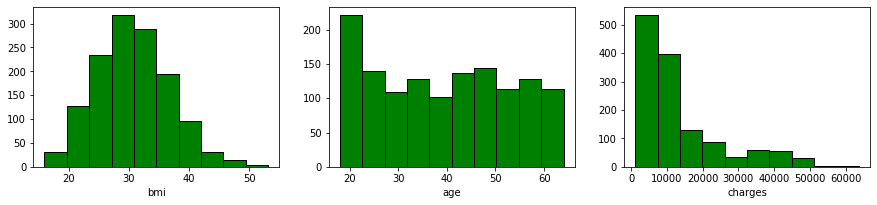

In [9]:
plt.figure(figsize= (15,10))
plt.subplot(3,3,1)
plt.hist(data.bmi, color='green', edgecolor = 'black')
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(data.age, color='green', edgecolor = 'black')
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(data.charges, color='green', edgecolor = 'black')
plt.xlabel('charges')

plt.show()

1.Bmi looks quietly normally distributed.
2.Age looks quietly normally distributed.
3.Charges are highly skewed.

# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [10]:
# Method 1
d1=data.drop(['children'],axis=1)
d1.skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

1.Age is uniformly distributed and there's hardly any skew.
2.Skew of bmi is very less.
2.charges are highly skewed.

In [11]:
import scipy.stats as stats
from scipy.stats import skew

In [12]:
 #Method-2 Measure the skeweness of the required columns-Stats Measure

Skew = pd.DataFrame({'Skewness' : [stats.skew (data.bmi),stats.skew (data.age),stats.skew (data.charges)]},
                        index=['bmi','age','charges']) 

In [13]:
Skew

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

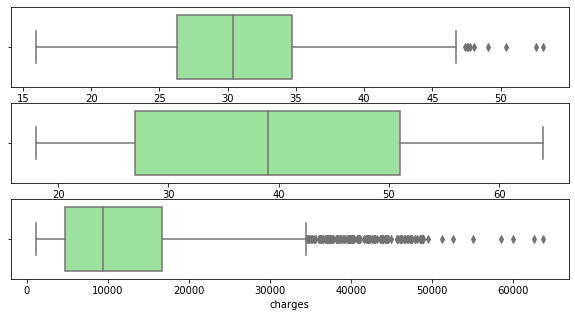

In [14]:
#Checking for the outliers(Boxplot-5 point Summary)
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
sns.boxplot(x= data.bmi, color='lightgreen')

plt.subplot(3,1,2)
sns.boxplot(x= data.age, color='lightgreen')

plt.subplot(3,1,3)
sns.boxplot(x= data.charges, color='lightgreen')

plt.show()

1.Bmi has a few extreme values.
2.Charges have a  lot of extreme values as outliers

# Distribution of categorical columns (include children)

Text(0.5, 1.0, 'Gender distribution')

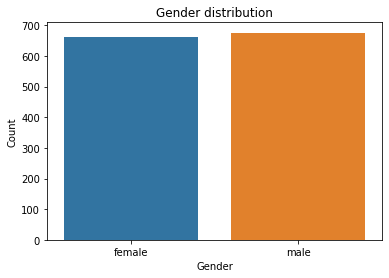

In [15]:
sns.countplot(x ='sex', data = data) 
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

Text(0.5, 1.0, 'Smoker distribution')

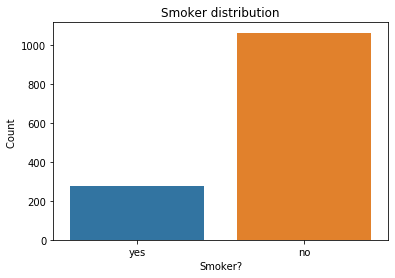

In [16]:
sns.countplot(x ='smoker', data = data) 
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

Text(0.5, 1.0, "Regions' distribution")

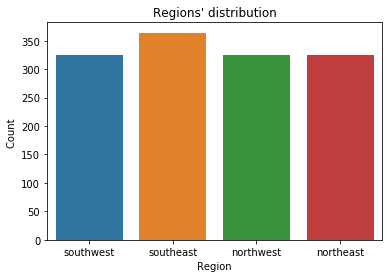

In [17]:
sns.countplot(x ='region', data = data) 
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

Text(0.5, 1.0, 'Children distribution')

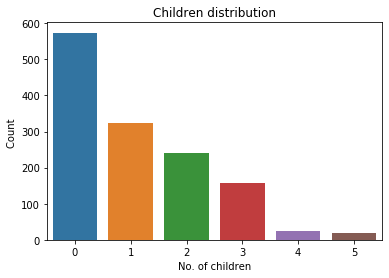

In [18]:
sns.countplot(x ='children', data = data)
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

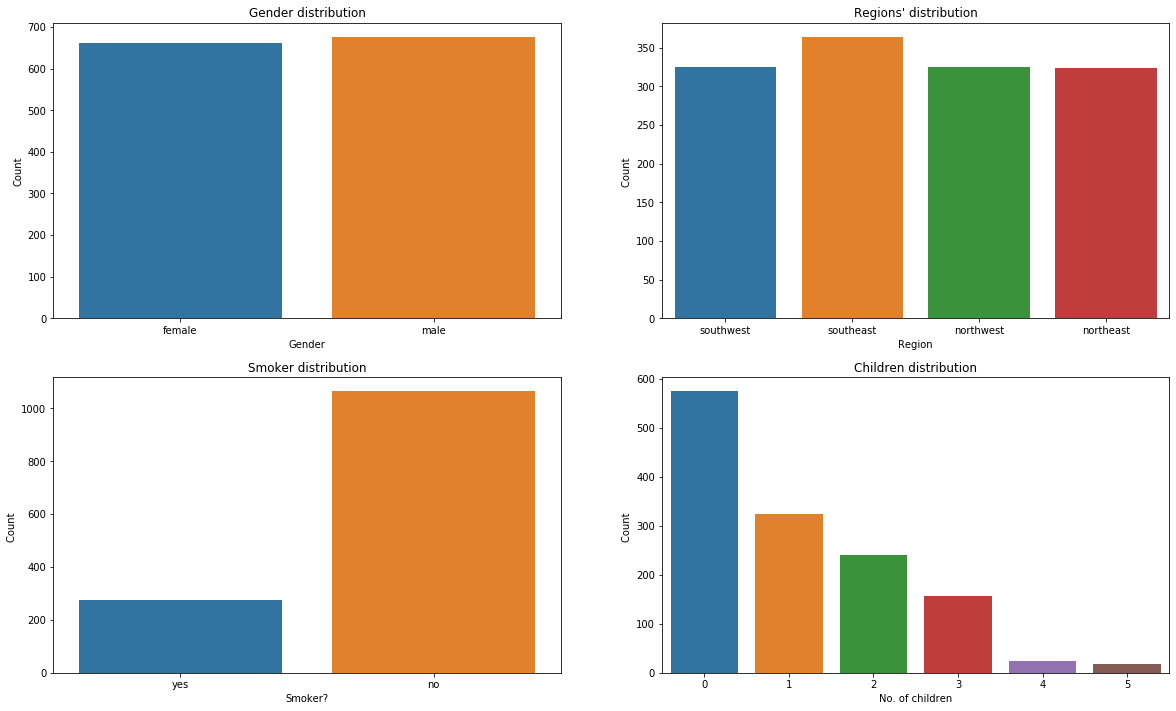

In [19]:
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.countplot(x ='sex', data = data) 
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

plt.subplot(4,2,2)
sns.countplot(x ='region', data = data) 
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

plt.subplot(4,2,3)
sns.countplot(x ='smoker', data = data) 
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

plt.subplot(4,2,4)
sns.countplot(x ='children', data = data)
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

There are a lot more non-smokers than there are smokers in the data
Data Instances are distributed evenly accross all regions
Gender is distributed evenly
Most instances have less than 2 children and very few have 4 or 5 children.

# Pair plot that includes all the columns of the data frame 

In [20]:
#Making a Copy of the original DataFrame where any changes to original does not affect new DataFrame
import copy
d1 = copy.deepcopy(data)

In [21]:
#Here is the complete dictionary for converting the categorical columns to numbers:

converting = {"sex":     {"male":1 , "female": 0},
                "region": {"northeast": 0, "northwest": 1, "southeast": 2, "southwest": 3},
                   "smoker":     {"yes":0 , "no": 1}}

In [22]:
#Replacing Categorical data to numbers
d1.replace(converting, inplace=True)
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520


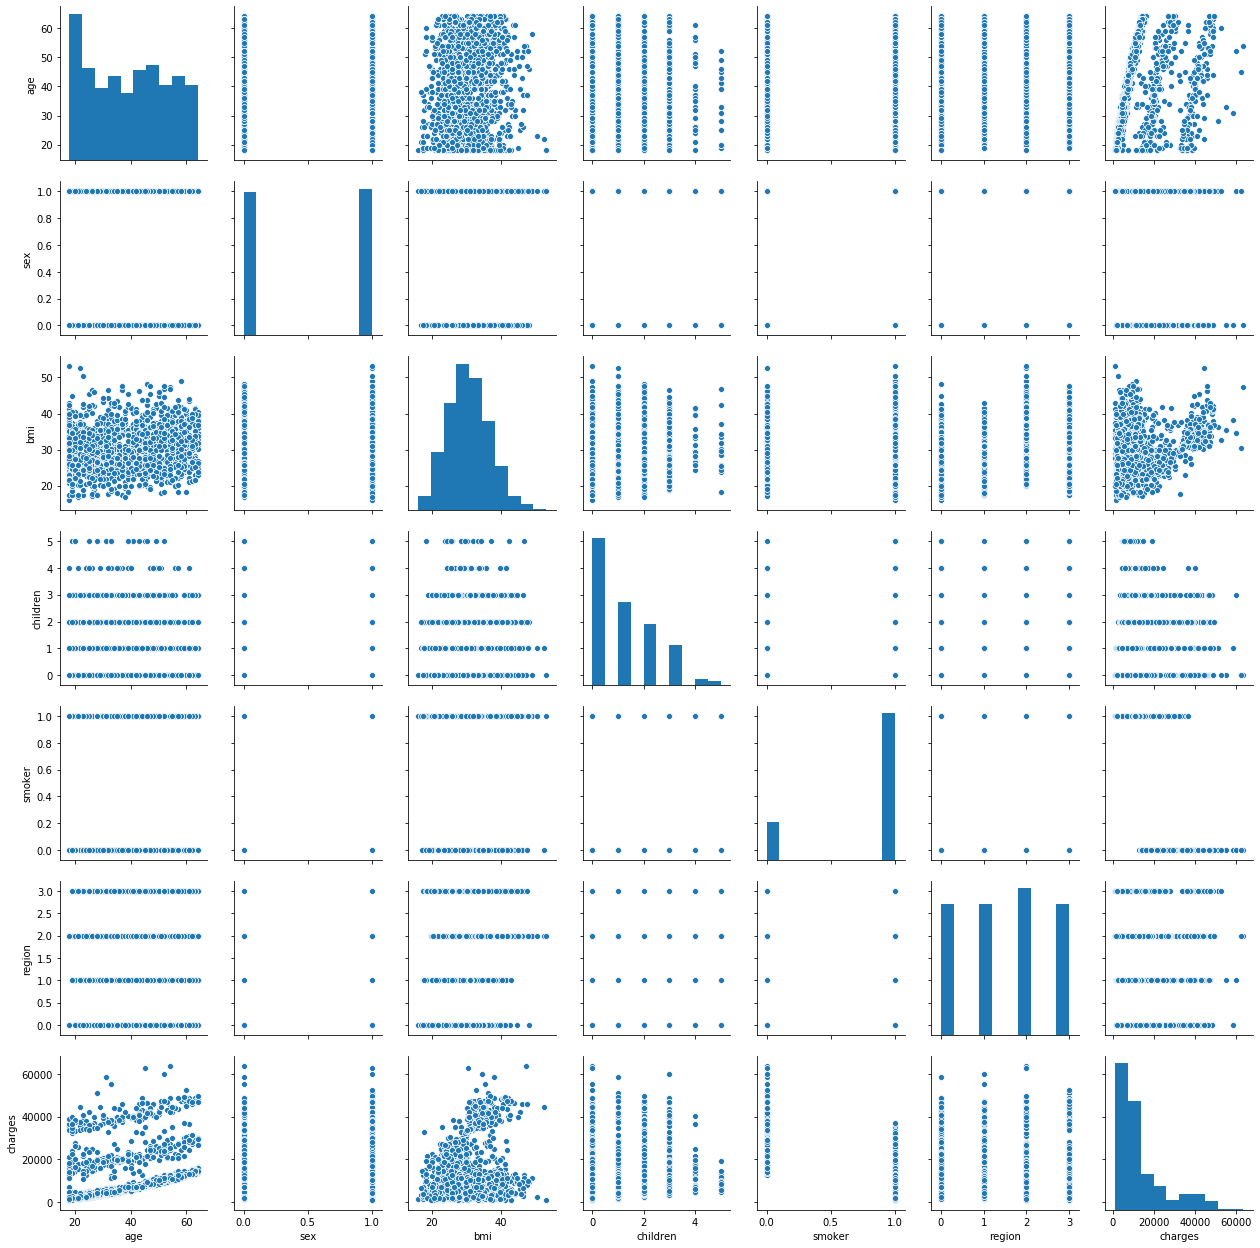

In [23]:
sns.pairplot(d1)

The correlation of 'charges' is with 'smoker'.
Smokers claimed more money than non-smokers
There's a pattern between 'age' and 'charges,may be coz older people are charged more than the younger ones

#  Do charges of people who smoke differ significantly from the people who don`t

In [24]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

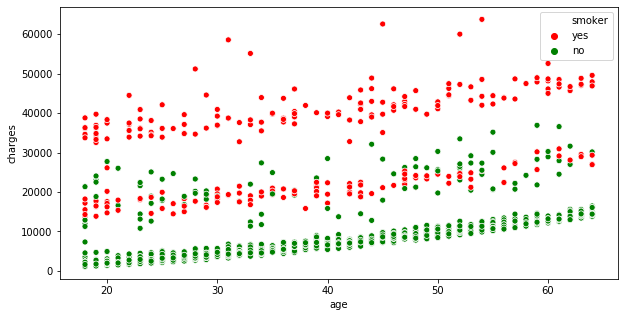

In [25]:
#Scatter plot to look for visual evidence of dependency between smoker and charges across different ages
plt.figure(figsize=(10,5))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['red','green'])
plt.show()

In [26]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Alternate Hypothesis

x = np.array(data[data.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(data[data.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


Smokers seem to claim more money than non smokers ,even the older people are charged more than younger ones.

# Does bmi of males differ significantly from that of females? 

In [27]:
#Checking the distribution of males and females
data.sex.value_counts() 

male      676
female    662
Name: sex, dtype: int64

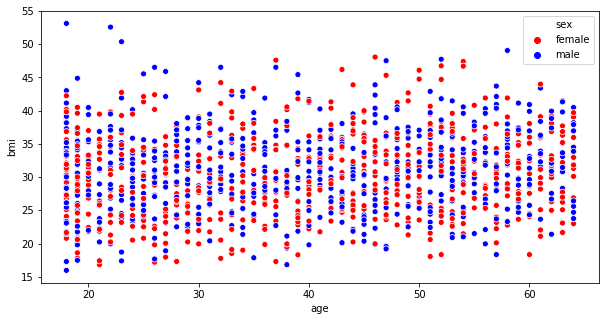

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data.age, data.bmi,hue=data.sex,palette= ['red','blue'], )
plt.show()


Bmi of both genders are almost same

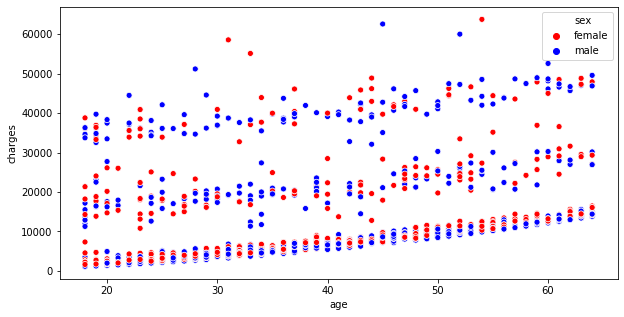

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data.age, data.charges,hue=data.sex,palette= ['red','blue'], )
plt.show()

There is no relationship between Gender and Charges

In [30]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Null Hypothesis
Ha = "Gender has an effect on bmi"   #Alternate Hypothesis

x = np.array(data[data.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(data[data.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(4)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(4)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


BMI of both Genders are identical.


# Is the proportion of smokers significantly different in different genders? 

In [31]:
# Chi_square test for 2 categorical columns
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Alternate Hypothesis

crosstab = pd.crosstab(data['sex'],data['smoker'])  # Contingency table of sex and smoker.

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


In [32]:
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


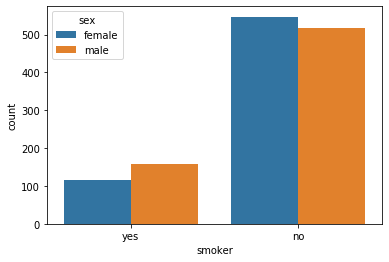

In [33]:
proportion = sns.countplot(x="smoker", hue="sex",data=data)

Proportion of smoking habit is different in different gender

# Is the distribution of bmi across women with no children, one child and two children, the same?

In [34]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Null Hypothesis
Ha = "No. of children has an effect on bmi"   #Alternate Hypothesis


female_data = copy.deepcopy(data[data['sex'] == 'female'])

zero = female_data[female_data.children == 0]['bmi']
one = female_data[female_data.children == 1]['bmi']
two = female_data[female_data.children == 1]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.812) > 0.05


In [35]:
female_data = copy.deepcopy(data[data['sex'] == 'female'])
female_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


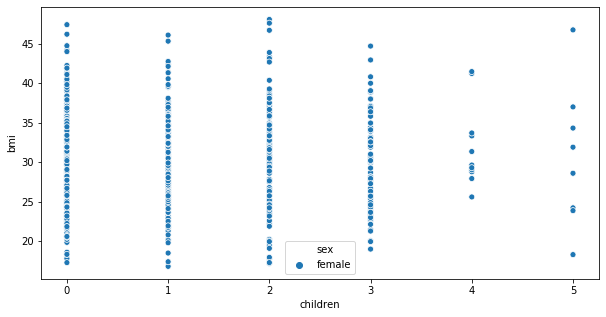

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(female_data.children, female_data.bmi,  hue='sex',data=female_data)
plt.show()

BMI is not changed by the number of children a women has

So we know that smoking is the feature who has the most effect on the charges. Followed by age and bmi. 